In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:,[3,4]].values

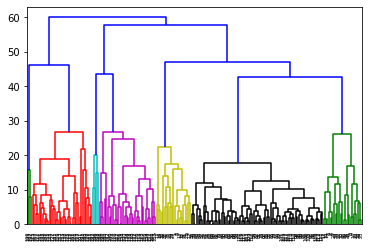

In [4]:
from scipy.cluster.hierarchy import dendrogram,average
linkage_array_average = average(X)
Dendrogram = dendrogram(linkage_array_average)

So now from the dendrogram we can see that the number of clusters that should be formed is 7.

In [5]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
cluster_values = [None]*(len(samples))
no_of_clusters = 7
flag = 100 #flag is used to denote the distance between same point which will be 0 but will hamper calculation

Function description:

    dist_matrix_calc():
    
        ~This function is used to update values in distance_matrix after a cluster is formed.
    
        ~It first makes changes in the initial m*m distance_mat and then copies the data into a (m-1)*(m-1) matrix.
    
        ~The values are updated according to average linkage method.

In [6]:
def dist_matrix_calc(l,distance_mat,index_added):
    matrix = np.empty((l,l))
    
    #updating data in distance_mat
    for i in range(len(distance_mat)):
        if distance_mat[index_added[0]][i] == flag or distance_mat[index_added[1]][i] == flag:
            if distance_mat[index_added[0]][i] == flag:
                distance_mat[index_added[0]][i] = flag
        else:
            distance_mat[index_added[0]][i] = (distance_mat[index_added[0]][i]\
                                                  +distance_mat[index_added[1]][i])/2
        distance_mat[index_added[1]][i] =-1
        
    for i in range(len(distance_mat)):
        if distance_mat[i][index_added[0]] == flag or distance_mat[i][index_added[1]] == flag:
            if distance_mat[i][index_added[0]] == flag:
                distance_mat[i][index_added[0]] = flag
        else:
            distance_mat[i][index_added[0]] = (distance_mat[i][index_added[0]]\
                                                  +distance_mat[i][index_added[1]])/2
        distance_mat[i][index_added[1]] =-1
        
    #copying data into matrix while ignoring a row and a column
    mm,nn=0,0
    for i in range(l):
        if distance_mat[mm][0]==-1:
            mm+=1
        nn=0
        for j in range(l):
            if distance_mat[mm][nn]==-1:
                nn+=1
            matrix[i][j]=distance_mat[mm][nn]
            nn+=1
        mm+=1
    return matrix

Function description:

    1) initial_dist_compute(sample): This function is used to calculate the distance between all the solo points 
                                     at the beginning of clustering. this is only called once.
                                     
    2) dist_calculate(x1,x2)       : This function calculate the Euclidian distance between point x1 and x2

In [7]:
def initial_dist_compute(sample):
    l = len(sample)
    matrix = np.zeros((l,l))
    for i in range(l):
        for j in range(l):
            matrix[i][j]=flag if i==j else dist_calculate(sample[i][0],sample[j][0])
    return matrix

def dist_calculate(x1,x2):
    return ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)**0.5

Function description:

    removeNesting(): This is a recursive function which converts a nested list to a flat list.


In [8]:
def removeNesting(l):
    for i in l:
        if type(i)==list:
            removeNesting(i)
        else:
            output.append(i)

In [9]:
m = len(progression)
distance_matrix = initial_dist_compute(samples)

while m>no_of_clusters:
    # finding the index number of the smallest distance in the 'distance_matrix'
    sample_ind_needed = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
    
    # clustering data inside the 'progression' list
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    progression.pop(sample_ind_needed[1])
    
    m=len(progression)
    distance_matrix = dist_matrix_calc(m,distance_matrix,sample_ind_needed)
    

In [10]:
clusters = []
for i in range(no_of_clusters):
    output = []
    a = removeNesting(progression[i])
    clusters.append(output)
print(np.array(clusters))

[list([0, 4, 16, 20, 18, 26, 28, 38, 44, 40, 42, 2, 6, 8, 10, 12, 14, 22, 30, 32, 24, 34, 36])
 list([1, 3, 5, 13, 15, 9, 17, 27, 43, 51, 53, 45, 7, 11, 19, 21, 23, 31, 37, 39, 25, 29, 35, 33, 41])
 list([46, 50, 52, 60, 61, 70, 73, 63, 65, 68, 54, 57, 59, 67, 69, 56, 58, 62, 64, 66, 72, 47, 48, 49, 55, 71, 74, 77, 85, 79, 82, 83, 89, 96, 92, 97, 99, 95, 101, 109, 107, 113, 106, 110, 114, 115, 91, 93, 94, 98, 100, 105, 108, 112, 116, 118, 121, 75, 76, 81, 78, 80, 84, 86, 88, 87, 90, 102, 117, 103, 104, 111, 119, 120, 122])
 list([123, 127, 141, 145, 135, 143, 149, 155, 151, 161, 163, 167, 173, 175, 179, 181, 183, 125, 129, 131, 133, 137, 139, 147, 159, 153, 157, 165, 171, 169, 177, 185, 189, 193, 187, 191])
 list([124, 126, 132, 142, 146, 160, 128, 130, 138, 144, 134, 136, 140, 156, 158, 162, 148, 152, 150, 154, 164, 168, 166, 170, 174, 176, 172, 178, 182, 186, 190, 188, 180, 184])
 list([192, 194, 196, 198]) list([195, 197, 199])]


In [11]:
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        cluster_values[clusters[i][j]] = i
np.array(cluster_values)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 5, 6, 5, 6,
       5, 6])

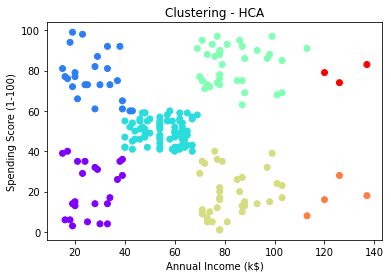

In [12]:
plt.title('Clustering - HCA')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(X[:,0], X[:,1], c=cluster_values, cmap='rainbow')
plt.show()